<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
pwd

'C:\\Users\\rkim1\\Documents\\GA\\unit-2_project-master'

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [196]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [35]:
#Row: 979, Column: 6
movies.shape

(979, 6)

#### Check the data type of each column.

In [143]:
#type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [37]:
#average of movie duration
movies["duration"].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [172]:
#after sorting it by durations from shortest to longest order, and head(1) outputs the shortest and tail(1) outputs the longest
movies.sort_values("duration", ascending = False).head(1)
movies.sort_values("duration", ascending = False).tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

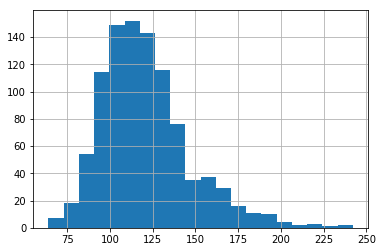

In [175]:
#histogram with bins of 20
movies["duration"].hist(bins=20)

#### Use a box plot to display that same data.

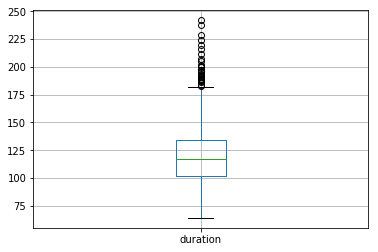

In [35]:
#boxplot
movies.boxplot("duration")

## Intermediate level

#### Count how many movies have each of the content ratings.

In [154]:
#grouped by "content rating" and found counts of "title". Then sort by descending order
content_rating_count = movies.groupby("content_rating")["title"].count().sort_values(ascending = False)
content_rating_count

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Movies Count')

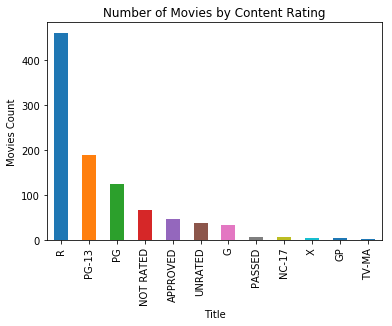

In [157]:
#visualized by bar plot. x axis is "title" and y axis is "content_rating"
content_rating_count.plot.bar(x="title", y = "content_rating")
#adding title
plt.title("Number of Movies by Content Rating")
#adding x-axis title
plt.xlabel("Title")
#adding y-axis title
plt.ylabel("Movies Count")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [158]:
#replace to "UNRATED"
movies.replace(["NOT RATED", "APPROVED","PASSED","GP"], "UNRATED")
unrated_replace.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [159]:
#replace to "NC-17"
movies.replace(["X","TV-MA"], "NC-17")
rating_replace.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Count the number of missing values in each column.

In [160]:
#isnull finds empty values, then sum
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [178]:
#find missing values
movies[movies["content_rating"].isnull()]
#fill with UNRATED. Now no more missing value.
movies.content_rating.fillna("UNRATED")

0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [179]:
#average star rating for movies 2 hrs or longer
twohr_more = movies[movies["duration"] >= 120]["star_rating"].mean()
#average star rating for movies shorter than 2hrs
twohr_less = movies[movies["duration"] < 120]["star_rating"].mean()

#comparing the two
diff = twohr_more -twohr_less
print("movies with 2 hrs or longer have higher average star rating than movies shorter than 2 hrs by ", diff)

movies with 2 hrs or longer have higher average star rating than movies shorter than 2 hrs by  0.11023201174742514


#### Use a visualization to detect whether there is a relationship between duration and star rating.

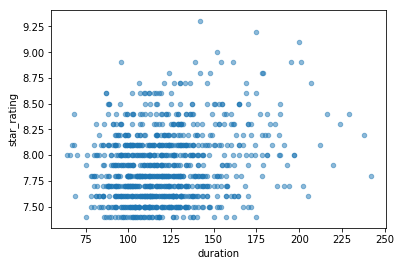

In [180]:
#It does not seem to have specific relationship between duration and star rating
movies.plot(kind="scatter", x= "duration", y="star_rating", alpha=.5)

#### Calculate the average duration for each genre.

In [165]:
#average duration for each genre
movies.groupby("genre")['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

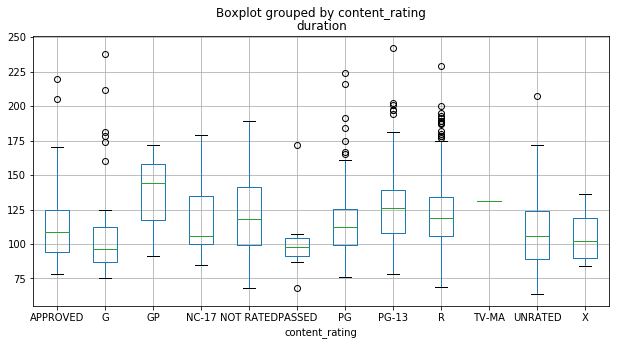

In [184]:
#for each content rating, created boxplot by duration.
movies.boxplot(column='duration', by='content_rating',figsize=(10,5))

#### Determine the top rated movie (by star rating) for each genre.

In [191]:
#sorting the data by highest star rating to lowest then group by genre and only want "title"
movies.sort_values("star_rating", ascending=False).groupby("genre").title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [168]:
#checks for dups 
dup = movies[movies["title"].duplicated()]

#checks if dups we found above exist in the data
movies[movies["title"].isin(dup)]
#not actually dups

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [199]:
#looking at the value_counts, manually create list of genres with at least 10 movies
movies.genre.value_counts()
atleast_ten = ['Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery']
#genres that are in "atleast_ten", find average star rating
movies[movies["genre"].isin(atleast_ten)].groupby("genre").mean().star_rating

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [207]:
#find genres with at least 10 movies
gen_10 =movies.groupby("genre").count().title > 10
#creates list of genre
list_gen_10 = gen_10[gen_10].index
#find average star_rating
movies[movies["genre"].isin(list_gen_10)].groupby("genre").mean().star_rating

genre
Action        True
Adventure     True
Animation     True
Biography     True
Comedy        True
Crime         True
Drama         True
Family       False
Fantasy      False
Film-Noir    False
History      False
Horror        True
Mystery       True
Sci-Fi       False
Thriller     False
Western      False
Name: title, dtype: bool

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [201]:
#find average of all genres and then use boolean(True/False) to filter
movies.groupby("genre").mean().star_rating[movies.groupby("genre").count().title >10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [205]:
#find count and mean using aggreagation and used boolean to filter
movies.groupby("genre").star_rating.agg(['count','mean'])[movies.groupby("genre").count().title >10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [388]:
#Number of Movies by Actors

#split actors_list column by comma, remove brackets, and named the columns
actors_list = movies["actors_list"].str.replace("[", "").str.replace("]","")
actors = actors_list.str.split(',', expand=True)
actors.columns = ['first','second','third']

#create list and append all three columns
list_of_actors =actors['first'].tolist() + actors['second'].tolist() + actors['third'].tolist()

#find number of movies each actors starred in
lst = [(i, list_of_actors.count(i)) for i in list_of_actors]
num_act =pd.DataFrame(lst, columns = ["Actors", "Number of Movies"])
num_act.sort_values("Number of Movies", ascending= False).drop_duplicates().head(3)

#Rober De Niro, Tom Hanks, Clint Eastwood are the top 3 actors that starred in the movies the most (in this data)

,Actors,Number of Movies
166,u'Robert De Niro',13
117,u'Tom Hanks',12
515,u'Clint Eastwood',11
